In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 import pandas as pd

In [ ]:
df = pd.read_csv('limite_clientes.csv', sep=';')

In [ ]:
df.head(4)

,id_cliente,idade,uf,estado_civil,classe_economica,rendimento,salario,credito,patrimonio,limite
0,1,81.0,MA,casado,C,6800,6800.0,380,299109.0,2000
1,2,35.0,TO,solteiro,C,5000,5000.0,1000,120000.0,1000
2,3,39.0,MS,solteiro,C,6320,6320.0,1550,100000.0,1640
3,4,70.0,RO,viuvo,C,10736,5214.0,400,100000.0,500


## Tipos Variáveis

In [ ]:
# Variáveis qualitativas ordinal
df.classe_economica.unique()

array(['C', 'B', nan, 'D', 'A'], dtype=object)

In [ ]:
# Variáveis qualitativas nominal
df.estado_civil.unique()

array(['casado', 'solteiro', 'viuvo', 'divorciado', nan, 'separado'],
      dtype=object)

In [ ]:
# Variáveis quantitativas discreta
df.idade.values[:10]

array([81., 35., 39., 70., 54., 64., 69., nan, 30., 72.])

In [ ]:
# Variáveis quantitativas continua
df.salario.values[:10]

array([ 6800.,  5000.,  6320.,  5214.,  6000., 15000., 22000.,  4027.,
          nan,  7825.])

## População e Amostra

In [ ]:
df.shape # população

(48, 10)

In [ ]:
df.sample(frac=0.10) # amostra (10% da população)

,id_cliente,idade,uf,estado_civil,classe_economica,rendimento,salario,credito,patrimonio,limite
3,4,70.0,RO,viuvo,C,10736,5214.0,400,100000.0,500
26,27,75.0,ES,solteiro,D,12200,2580.0,3000,500000.0,10000
23,24,74.0,DF,divorciado,D,14584,1320.0,3000,1310000.0,2500
29,30,66.0,PA,viuvo,C,4800,4800.0,440,520000.0,1500
24,25,62.0,ES,viuvo,NaN,17800,NaN,3000,100000.0,6000


In [ ]:
df.sample(frac=0.10).shape

(5, 10)

## Medidas de posição e variabilidade

In [ ]:
s = pd.DataFrame({'salario': [23000, 18000,  25000, 15000, 12000, 15000]})

In [ ]:
s.mode()

,salario
0,15000


In [ ]:
s.mean()

salario    18000.0
dtype: float64

In [ ]:
s.median()

salario    16500.0
dtype: float64

In [ ]:
print(sorted(s.salario))
print((15000 + 18000) / 2)

[12000, 15000, 15000, 18000, 23000, 25000]
16500.0


In [ ]:
s.min()

salario    12000
dtype: int64

In [ ]:
s.max()

salario    25000
dtype: int64

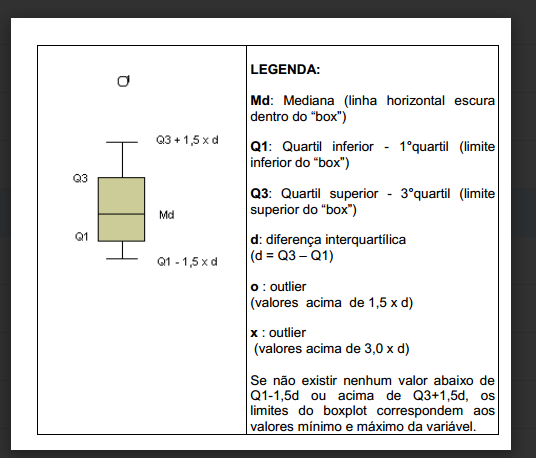

In [27]:
si = pd.DataFrame({'idades': [43, 32, 24, 25, 25, 27, 30, 32, 35, 42,60]})

In [ ]:
si = pd.DataFrame({'idades': [43, 32, 24, 25, 25, 27, 30, 32, 35,50]})

In [ ]:
d*1,5

(idades    7.0
 dtype: float64,
 5)

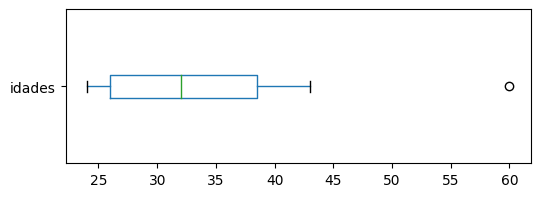

In [28]:
si.boxplot(vert=False, grid=False, figsize=(6, 2));


In [ ]:
sorted(si.idades)

[24, 25, 25, 27, 30, 32, 32, 35, 43]

In [5]:
si.median()

idades    30.0
dtype: float64

In [ ]:
median=si.median()

In [ ]:
si.quantile(q=0.25)

idades    25.0
Name: 0.25, dtype: float64

In [6]:
q1= si.quantile(q=0.25)

In [7]:
q1

idades    25.0
Name: 0.25, dtype: float64

In [ ]:
si.quantile(q=0.5)

idades    30.0
Name: 0.5, dtype: float64

In [8]:
q2=si.quantile(q=0.5)

In [9]:
q2

idades    30.0
Name: 0.5, dtype: float64

In [10]:
si.quantile(q=0.75)

idades    32.0
Name: 0.75, dtype: float64

In [11]:
q3= si.quantile(q=0.75)

In [12]:
# amplitude interquartil
# (Q3 - Q1)
aiq = si.quantile(q=0.75) - si.quantile(q=0.25)
aiq

idades    7.0
dtype: float64

In [ ]:
d= q3 - q1
d

idades    7.0
dtype: float64

In [13]:
li = si.quantile(q=0.25) - (1.5 * aiq)
li

idades    14.5
dtype: float64

In [ ]:
li = q1 - (1.5 * aiq)
li

idades    14.5
dtype: float64

In [14]:
ls = q3 + (1.5 * aiq)
ls

idades    42.5
dtype: float64

In [ ]:
# limit inferior
li = si.quantile(q=0.25) - (1.5 * aiq)
li= li[0]
li

14.5

In [ ]:
# limit superopr
ls = si.quantile(q=0.75) + (1.5 * aiq)
ls = ls[0]
ls

42.5

In [ ]:
idades = si.values

In [ ]:
idades[idades < li]

array([], dtype=int64)

Como não existe valor menor que o limite inferior não existe nenhum outlier a ser considerado abaixo do limite inferior.

In [ ]:
idades[idades > ls]

array([43])

Como existe valor maior que o limite superior calculado, esse valor (43) será considerado um *outlier*.

Por fim, o limite superior verdadeiro, que é plotado no gráfico, é o maior valor disponível no conjunto de dados exceto o *outlier*.

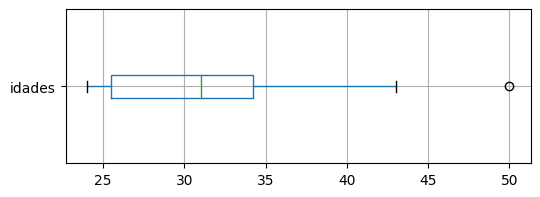

In [ ]:
si.boxplot(vert=False, grid=True, figsize=(6, 2));
# By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1)
# from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots

### Desvio e Variância

In [ ]:
dfv = pd.DataFrame({
    'vendedor1': [52000, 50000, 48000, 50000],
    'vendedor2': [40000, 50000, 60000, 50000]
})
dfv

,vendedor1,vendedor2
0,52000,40000
1,50000,50000
2,48000,60000
3,50000,50000


In [ ]:
dfvv =  dfv.copy()
dfvv.loc['media'] = [dfv.vendedor1.mean(), dfv.vendedor2.mean()]
dfvv

,vendedor1,vendedor2
0,52000.0,40000.0
1,50000.0,50000.0
2,48000.0,60000.0
3,50000.0,50000.0
media,50000.0,50000.0


In [ ]:
dfv.insert(1, 'desvio1',dfv.vendedor1.apply(lambda x: x - dfv.vendedor1.mean()))
dfv.insert(3, 'desvio2',dfv.vendedor2.apply(lambda x: x - dfv.vendedor2.mean()))

In [ ]:
dfv

,vendedor1,desvio1,vendedor2,desvio2
0,52000,2000.0,40000,-10000.0
1,50000,0.0,50000,0.0
2,48000,-2000.0,60000,10000.0
3,50000,0.0,50000,0.0


In [ ]:
dfv.loc['media'] = [dfv.vendedor1.mean(), '', dfv.vendedor2.mean(), '']
dfv

,vendedor1,desvio1,vendedor2,desvio2
0,52000.0,2000.0,40000.0,-10000.0
1,50000.0,0.0,50000.0,0.0
2,48000.0,-2000.0,60000.0,10000.0
3,50000.0,0.0,50000.0,0.0
media,50000.0,,50000.0,


In [ ]:
dfv.iloc[:4, :].desvio1.var(ddof=0)

2000000.0

In [ ]:
dfv.iloc[:4, :].desvio2.var(ddof=0)

50000000.0

In [ ]:
import numpy as np

np.sqrt(dfv.iloc[:4, :].desvio1.var(ddof=0))

1414.213562373095

In [ ]:
np.sqrt(dfv.iloc[:4, :].desvio2.var(ddof=0))

7071.067811865475

O parâmetro `ddof=0` realiza a variância e desvio padrão populacional.

A variância populacional é uma medida estatística que mede a dispersão dos valores de uma variável em uma população inteira. Em outras palavras, ela indica o quão distantes os valores individuais estão da média da população.

In [ ]:
dfv.iloc[:4, :].desvio1.var()

2666666.6666666665

In [ ]:
dfv.iloc[:4, :].desvio2.var()

66666666.666666664

In [ ]:
np.sqrt(dfv.iloc[:4, :].desvio1.var())

1632.993161855452

In [ ]:
np.sqrt(dfv.iloc[:4, :].desvio2.var())

8164.96580927726

Geralmente, utiliza-se a variância amostral `para tirar conclusões sobre a população quando é impraticável ou impossível examinar toda a população.`

Esse é o padrão na Biblioteca Pandas.

In [ ]:
# Resumo
pd.set_option('display.float_format', '{:.2f}'.format)

dfv = pd.DataFrame({
    'vendedor1': [52000, 50000, 48000, 50000],
    'vendedor2': [40000, 50000, 60000, 50000]
})

dfv.loc['media'] = [dfv.iloc[:4, :].vendedor1.mean(), dfv.iloc[:4, :].vendedor2.mean()]
dfv.loc['var'] = [dfv.iloc[:4, :].vendedor1.var(), dfv.iloc[:4, :].vendedor2.var()]
dfv.loc['std'] = [dfv.iloc[:4, :].vendedor1.std(), dfv.iloc[:4, :].vendedor2.std()]
dfv

,vendedor1,vendedor2
0,52000.00,40000.00
1,50000.00,50000.00
2,48000.00,60000.00
3,50000.00,50000.00
media,50000.00,50000.00
var,2666666.67,66666666.67
std,1632.99,8164.97


In [ ]:
dfv.loc['coef_variacao'] = [
    (dfv.loc['std', 'vendedor1'] / dfv.loc['media', 'vendedor1']) * 100,
    (dfv.loc['std', 'vendedor2'] / dfv.loc['media', 'vendedor2']) * 100
]

In [ ]:
dfv

,vendedor1,vendedor2
0,52000.00,40000.00
1,50000.00,50000.00
2,48000.00,60000.00
3,50000.00,50000.00
media,50000.00,50000.00
var,2666666.67,66666666.67
std,1632.99,8164.97
coef_variacao,3.27,16.33


### Exercício

In [ ]:
dfe = pd.DataFrame({
    'fundo_1': [14, 13, 16],
    'fundo_2': [30, 26, 14],
    'fundo_3': [5, 20, 8],
})
dfe.index = ['jan','fev','mar']
dfe

,fundo_1,fundo_2,fundo_3
jan,14,30,5
fev,13,26,20
mar,16,14,8


In [ ]:
dfe.mean()

fundo_1   14.33
fundo_2   23.33
fundo_3   11.00
dtype: float64

In [ ]:
dfe.loc['media'] = dfe.iloc[:3, :].mean()
dfe.loc['std'] = dfe.iloc[:3, :].std()

In [ ]:
dfe

,fundo_1,fundo_2,fundo_3
jan,14.00,30.00,5.00
fev,13.00,26.00,20.00
mar,16.00,14.00,8.00
media,14.33,23.33,11.00
std,1.53,8.33,7.94


In [ ]:
dfe.loc['coef_variacao'] = (dfe.loc['std'] / dfe.loc['media']) * 100

In [ ]:
dfe

,fundo_1,fundo_2,fundo_3
jan,14.00,30.00,5.00
fev,13.00,26.00,20.00
mar,16.00,14.00,8.00
media,14.33,23.33,11.00
std,1.53,8.33,7.94
coef_variacao,10.66,35.69,72.16


## Distribuição de frequência

In [ ]:
df['estado_civil'].value_counts().to_frame().rename(columns={'estado_civil': 'frequencia_absoluta'})

,frequencia_absoluta
casado,11
viuvo,11
solteiro,8
divorciado,8
separado,5


In [ ]:
df['estado_civil'].value_counts(normalize=True).values

array([0.25581395, 0.25581395, 0.18604651, 0.18604651, 0.11627907])

In [ ]:
df_aux = pd.DataFrame({
    'estado_civil': df['estado_civil'].value_counts().index,
    'frequencia_absoluta': df['estado_civil'].value_counts().values,
    'frequencia_relativa': df['estado_civil'].value_counts(normalize=True).values
})

In [ ]:
df_aux

,estado_civil,frequencia_absoluta,frequencia_relativa
0,casado,11,0.26
1,viuvo,11,0.26
2,solteiro,8,0.19
3,divorciado,8,0.19
4,separado,5,0.12


In [ ]:
df_aux['frequencia_relativa_percentual'] = df['estado_civil'].value_counts(normalize=True).values * 100
df_aux['frequencia_relativa_percentual'] = df_aux['frequencia_relativa_percentual'].apply(lambda x: f'{round(x, 2):.2f} %')
df_aux

,estado_civil,frequencia_absoluta,frequencia_relativa,frequencia_relativa_percentual
0,casado,11,0.26,25.58 %
1,viuvo,11,0.26,25.58 %
2,solteiro,8,0.19,18.60 %
3,divorciado,8,0.19,18.60 %
4,separado,5,0.12,11.63 %


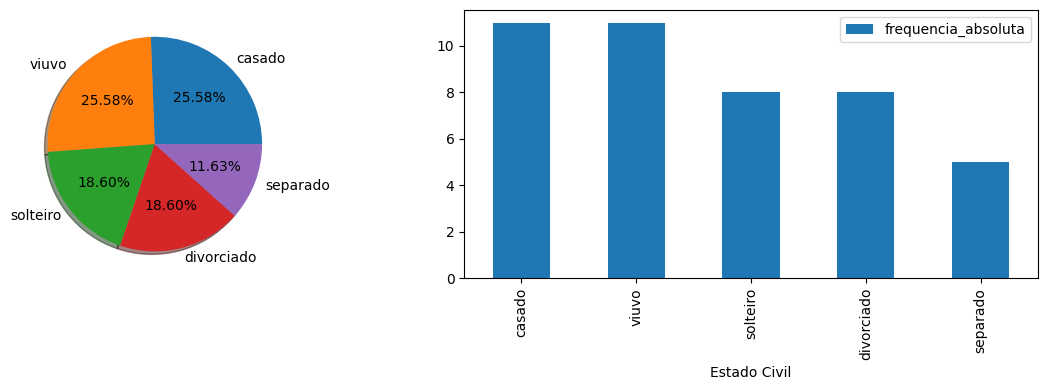

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

df_aux.plot(
    x='estado_civil',
    y='frequencia_absoluta',
    kind='pie',
    labels=df_aux.estado_civil.values,
    ylabel='',
    autopct='%.2f%%',
    shadow=True,
    ax=axs[0]
)

df_aux.plot(
    x='estado_civil',
    y='frequencia_absoluta',
    kind='bar',
    xlabel='Estado Civil',
    ax=axs[1]
)

fig.tight_layout()

axs[0].get_legend().remove()

In [ ]:
dfs = pd.DataFrame({
    'id_vendedor': [1, 2, 3, 4, 5],
    'total_vendas': [10, 35, 50, 35, 10]
})
dfs

,id_vendedor,total_vendas
0,1,10
1,2,35
2,3,50
3,4,35
4,5,10


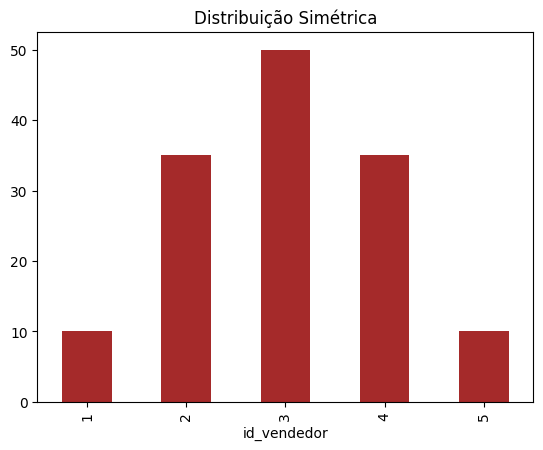

In [ ]:
dfs.plot(kind='bar', x='id_vendedor', y='total_vendas', color='brown', legend=False, title='Distribuição Simétrica');

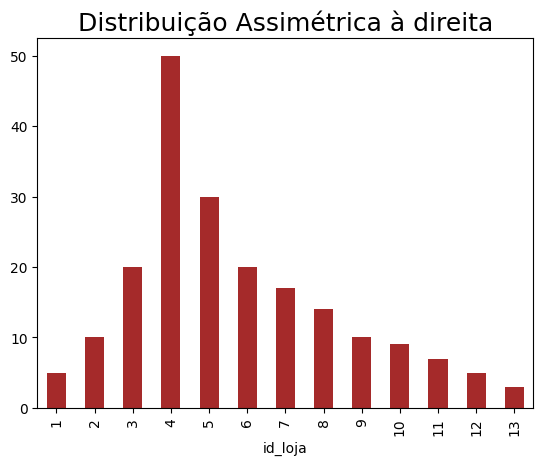

In [ ]:
dfs = pd.DataFrame({
    'id_loja': range(1, 14),
    'total_vendas': [5, 10, 20, 50, 30, 20, 17, 14, 10, 9, 7, 5, 3]
})

dfs.plot(kind='bar', x='id_loja', y='total_vendas', color='brown', legend=False)
plt.title('Distribuição Assimétrica à direita', fontsize = 18);

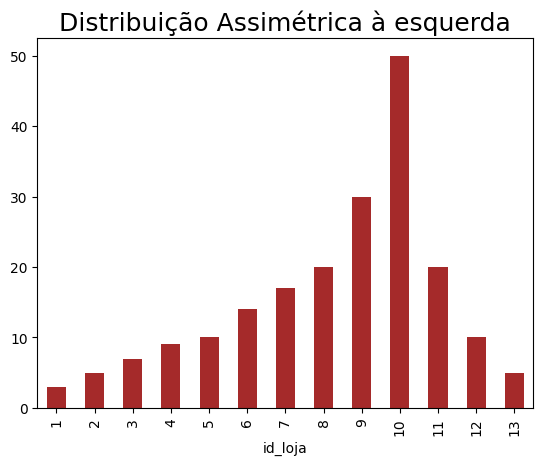

In [ ]:
dfs = pd.DataFrame({
    'id_loja': range(1, 14),
    'total_vendas': reversed([5, 10, 20, 50, 30, 20, 17, 14, 10, 9, 7, 5, 3])
})
dfs.plot(kind='bar', x='id_loja', y='total_vendas', color='brown', legend=False)
plt.title('Distribuição Assimétrica à esquerda', fontsize = 18);